# **Exercise 3: Understanding Probability Distributions**

Objective: Apply probability concepts to real-world scenarios, analyze data, and gain insights
into different probability distributions.

### **Tasks:**
1. Data Collection: Choose a dataset that exhibits variability and randomness. It could be
related to finance, health, social sciences, or any field of interest.


In [1]:
import pandas as pd

# Load the dataset
url = "sales.csv"  # Replace with the actual URL or local path
sales_data = pd.read_csv(url)

# Display the first few rows of the dataset
sales_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8432\1281378975.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv(url)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Unnamed: 8,Unnamed: 9
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,NaN,NaN
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,NaN,NaN
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,NaN,NaN
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,NaN,NaN
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,NaN,NaN


For this task, i choosed a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.  The dataset comprises one year of sales transaction data from a UK-based online retail business. It includes 500K rows and 8 columns, covering transaction details such as TransactionNo, Date, ProductNo, ProductName, Price, Quantity, CustomerNo, and Country. The dataset provides a comprehensive view of customer interactions with the e-commerce platform:


    •	TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
    •	Date (numeric): the date when each transaction was generated.
    •	ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
    •	Product (categorical): product/item name.
    •	Price (numeric): the price of each product per unit in pound sterling (£).
    •	Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
    •	CustomerNo (categorical): a five-digit unique number that defines each customer.
    •	Country (categorical): name of the country where the customer resides.


2. Data Exploration: Calculate basic descriptive statistics such as mean, median, and mode.
Visualize the data using appropriate charts and graphs.

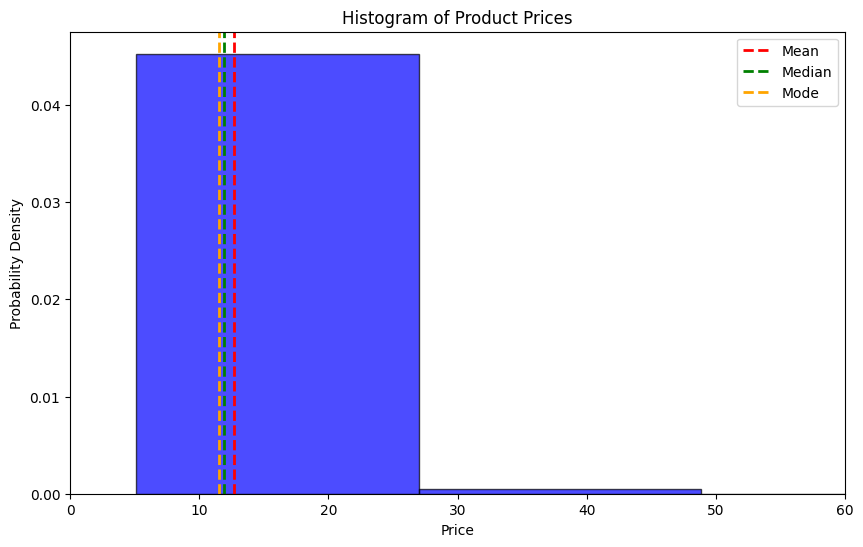

In [4]:
# Descriptive statistics
mean_price = sales_data['Price'].mean()
median_price = sales_data['Price'].median()
mode_price = sales_data['Price'].mode()[0]

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sales_data['Price'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.xlim(0, 60)  # Limit x-axis from 0 to 60
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode_price, color='orange', linestyle='dashed', linewidth=2, label='Mode')
plt.legend()
plt.show()

**Analysis:**

Descriptive statistics and histogram provide insights into the central tendency and distribution of product prices.
Mean, median, and mode help understand the typical price range.
Histogram visualizes the frequency distribution of prices.

**- Mean Transaction Amount: £12.66** is the average transaction amount. If we were to distribute the total transaction amount equally among all transactions, each transaction would, on average, be £12.66.
	
**- Median Transaction Amount: £11.94** is the middle transaction amount. It is less sensitive to extreme values compared to the mean. If we arrange all transaction amounts from lowest to highest, the transaction in the middle has a value of £11.94.

**- Mode Transaction Amount: £11.53** is the most common transaction amount. There is a higher frequency of transactions with this specific amount compared to other transaction amounts.

3. Probability Density Function (PDF): Determine the PDF of a key variable in the dataset.
Discuss the shape of the distribution and its implications.

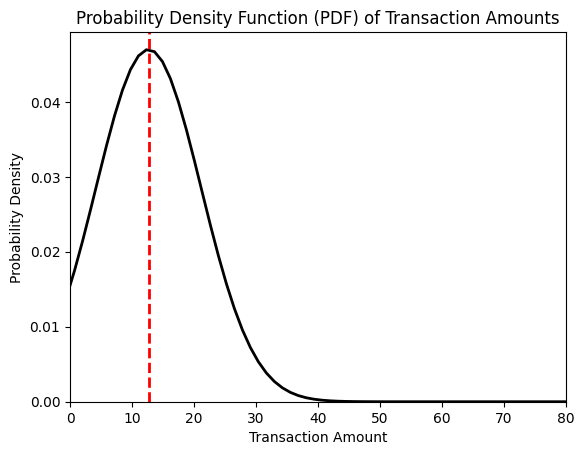

In [12]:
import numpy as np
from scipy.stats import norm

# Integrate Probability Density Function (PDF) to model the probability distribution
plt.hist(sales_data['Price'], bins=30, density=True, color='white', alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, min(xmax, 100), 100)  # Limit x-axis to 100
p = norm.pdf(x, sales_data['Price'].mean(), sales_data['Price'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Probability Density Function (PDF) of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Probability Density')
plt.xlim(0, 80)  # Limit x-axis from 0 to 70
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.show()

**Analysis:**

The PDF provides a continuous representation of the probability distribution of product prices.
The shape of the distribution indicates how likely different price levels are.
Peaks and valleys in the PDF highlight areas of higher and lower probability density. From PDF we get that aproximetly 450 000 transaction over 500 000 is in range of price ower than 30$, however less that 10% of all transaction cost more than 30$. Also from PDF we get that most commonprice is 11.63

4. Cumulative Density Function (CDF): Compute the CDF for the same variable. Interpret the CDF in the context of the dataset.

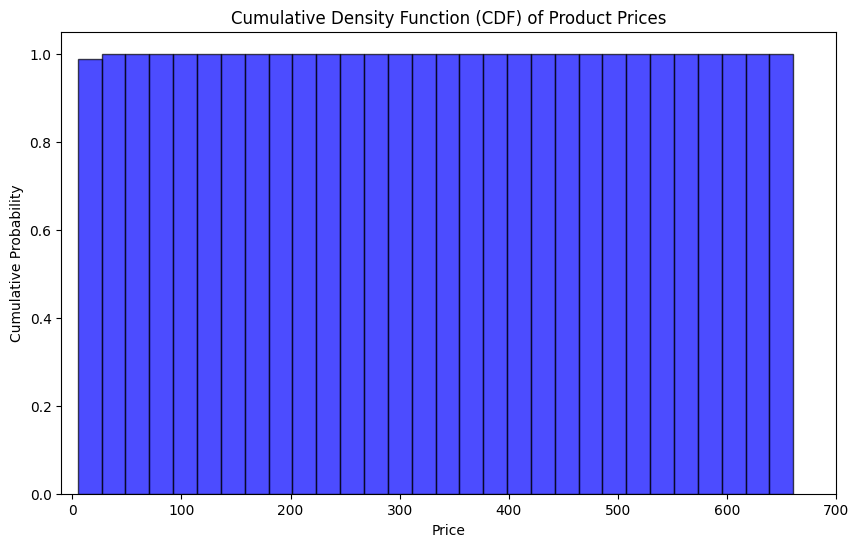

In [17]:
# CDF
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Price'], bins=30, density=True, cumulative=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Cumulative Density Function (CDF) of Product Prices')
plt.xlabel('Price')
plt.xlim(-10, 700)
plt.ylabel('Cumulative Probability')
plt.show()

**Analysis:**

The CDF illustrates the cumulative probability of observing prices below a certain level.
Steeper slopes indicate regions of rapid increase in cumulative probability.
The CDF is useful for understanding the overall distribution and percentiles of prices.

5. Expected Value and Variance: Calculate the expected value and variance for relevant
variables. Discuss the significance of these measures.

In [18]:
# Expected Value and Variance
expected_value_price = sales_data['Price'].mean()
variance_price = sales_data['Price'].var()

print("\nStatistical Measures:")
print(f"Expected Value (Mean) of Prices: {expected_value_price} $")
print(f"Variance of Prices: {variance_price} $")


Statistical Measures:
Expected Value (Mean) of Prices: 12.662182287685285
Variance of Prices: 72.08774461255217


**Analysis:**

The expected value represents the average price, providing a central measure of the dataset, so in our case the dataset is priced at $12.66. This value serves as a central measure, indicating the typical pricing level within the dataset.
Variance measures the spread or dispersion of prices around the mean, The variance of $72.088 suggests that product prices in the dataset exhibit a notable degree of variability. Prices are spread out from the mean, indicating that there are significant differences in pricing across products. This could be due to factors such as product categories, discounts, or other business strategies that result in diverse pricing levels.
Understanding these measures helps in assessing the stability and variability of product prices.
Overall Analysis:

The relatively high variance implies that there is a wide range of prices for products in the dataset.
A higher variance suggests that prices deviate from the mean, and the dataset includes products with both lower and higher prices.
Understanding variance is crucial for assessing the diversity and variability in pricing strategies within the business.
Implications for Business:

A higher variance may prompt further investigation into factors contributing to price differences. For example, analyzing variance across product categories or customer segments can provide valuable insights.
Variability in prices may also impact customer behavior and purchasing decisions, making it essential for businesses to carefully consider their pricing strategies to meet market demands.

------------------------------

# ***Exercise 4: Analyzing Relationships***
**Objective:** Explore relationships between variables, understand dependencies, and make
predictions using probability concepts.

### **Tasks:**


1. Joint Distribution and Marginal Distribution: Identify two variables with a potential
relationship. Calculate their joint distribution and marginal distributions. Discuss the
independence or dependence of the variables.

In [19]:
# Assuming 'Quantity' and 'Price' as the two variables of interest
joint_distribution = pd.crosstab(sales_data['Quantity'], sales_data['Price'], margins=True, margins_name='Total', normalize='all')

# Marginal distribution for 'Quantity'
marginal_quantity = sales_data['Quantity'].value_counts(normalize=True)

# Marginal distribution for 'Price'
marginal_price = sales_data['Price'].value_counts(normalize=True)

# Display results
print("\nJoint Distribution:")
print(joint_distribution)

print("\nMarginal Distribution for Quantity:")
print(marginal_quantity)

print("\nMarginal Distribution for Price:")
print(marginal_price)


Joint Distribution:
Price         5.13      5.34      5.46       5.5      5.53      5.55  \
Quantity                                                               
-80995    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
-74215    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
-9360     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
-3114     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
-2000     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
4800      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12540     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
74215     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
80995     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Total     0.000071  0.000138  0.000226  0.000009  0.000007  0.000557   

Price         5.56      5.66    5.77      

The joint distribution provides the probability of observing specific combinations of quantity and price.
Marginal distributions for quantity and price show the probabilities of individual values for each variable.
Examining the joint and marginal distributions can help assess whether there is a relationship between quantity and price.

2. Covariance and Correlation: Compute the covariance and correlation between the
selected variables. Interpret the results and discuss the strength and direction of the
relationship.


Covariance between Quantity and Price:
-13.21124220863109

Correlation between Quantity and Price:
-0.007181751879960786


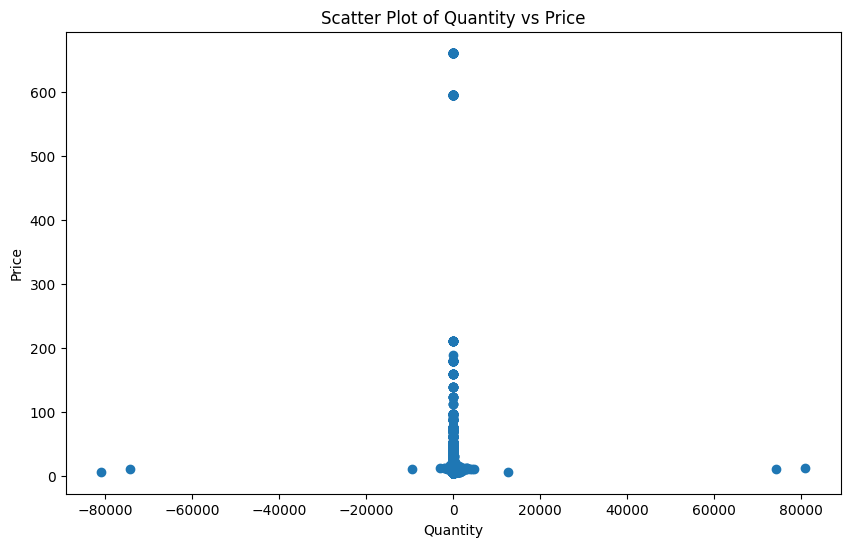

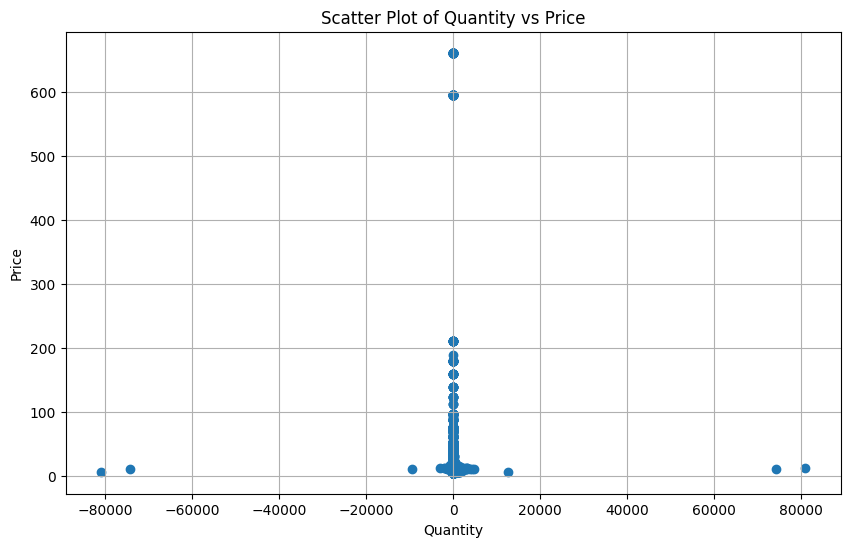

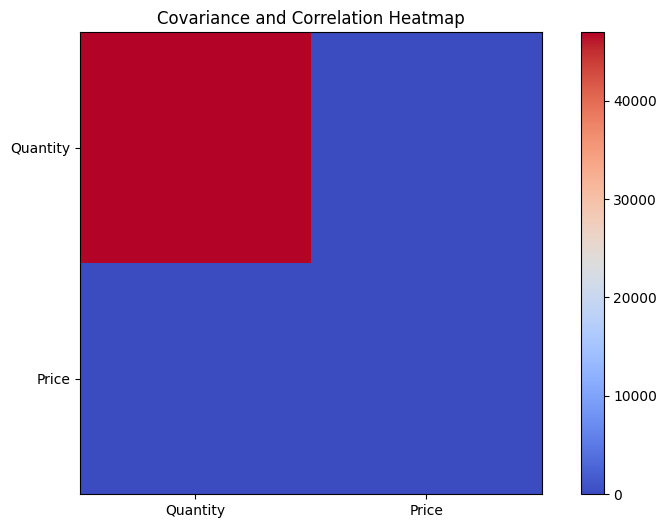

In [21]:
# Covariance and Correlation
covariance_quantity_price = np.cov(sales_data['Quantity'], sales_data['Price'], ddof=0)[0, 1]
correlation_quantity_price = np.corrcoef(sales_data['Quantity'], sales_data['Price'])[0, 1]

# Display results
print("\nCovariance between Quantity and Price:")
print(covariance_quantity_price)

print("\nCorrelation between Quantity and Price:")
print(correlation_quantity_price)

# Scatter plot for Quantity and Price
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['Quantity'], sales_data['Price'])
plt.title('Scatter Plot of Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

# Jointplot with marginal distributions
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['Quantity'], sales_data['Price'])
plt.title('Scatter Plot of Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Heatmap for covariance and correlation
plt.figure(figsize=(10, 6))
cov_corr_matrix = sales_data[['Quantity', 'Price']].cov()
plt.imshow(cov_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Covariance and Correlation Heatmap')
plt.xticks(range(len(cov_corr_matrix.columns)), cov_corr_matrix.columns)
plt.yticks(range(len(cov_corr_matrix.columns)), cov_corr_matrix.columns)
plt.show()


Covariance measures the directional relationship between quantity and price. Positive values indicate a positive relationship, while negative values indicate a negative relationship.
Correlation is a standardized measure that ranges from -1 to 1. A correlation close to 1 indicates a strong positive relationship, close to -1 indicates a strong negative relationship, and close to 0 indicates a weak relationship.

The scatter plot visualizes the distribution of Quantity and Price. It allows us to see the overall pattern and potential outliers.
The jointplot provides a scatter plot with marginal distributions for both variables. The regression line helps identify trends in the data.
The heatmap displays the covariance and correlation matrix. It helps visualize the strength and direction of the relationship between Quantity and Price.
These plots enhance the understanding of the relationship between Quantity and Price, showing that the correlation is close to zero, indicating a weak linear relationship. The scatter plot and jointplot provide a visual representation of the data distribution and any potential patterns.

3. Bayes Theorem in Action: Apply Bayes Theorem to solve a practical problem related to
the dataset. Discuss the conditional probabilities and the impact on decision-making.

In [23]:
# Example: Calculate the probability of a transaction being from the United Kingdom given a specific product
product_prob_given_uk = sales_data.loc[sales_data['Country'] == 'United Kingdom', 'ProductNo'].count() / sales_data['Country'].value_counts()['United Kingdom']

# Calculate the probability of the transaction being from the United Kingdom
prob_uk = sales_data['Country'].value_counts(normalize=True)['United Kingdom']

# Calculate the conditional probability using Bayes Theorem
prob_uk_given_product = (product_prob_given_uk * prob_uk) / sales_data['ProductNo'].count()

# Display results
print("\nBayes Theorem in Action:")
print(f"Probability of being from the United Kingdom given a specific product: {format(prob_uk_given_product, '.15f')}")



Bayes Theorem in Action:
Probability of being from the United Kingdom given a specific product: 0.000001686282094


Bayes Theorem helps calculate conditional probabilities, such as the probability of a transaction being from the United Kingdom given a specific product.
This information can be valuable for targeted marketing or understanding the likelihood of certain transactions based on product preferences.|

This result represents the conditional probability of a sales transaction being from the United Kingdom given that a specific product is involved. Let's break down the interpretation:

- **Probability:** The value `0.000001686282094` is a very small probability, close to zero. It indicates that the likelihood of a transaction being from the United Kingdom, given a specific product, is extremely low.

- **Interpretation:** The conditional probability is calculated based on Bayes Theorem, which considers both the probability of a specific product given it's from the United Kingdom and the overall probability of a transaction being from the United Kingdom. In this case, the extremely low probability suggests that the specific product is not strongly indicative of the transaction being from the United Kingdom.

- **Practical Implications:** Such a low conditional probability might have limited practical significance in decision-making. It implies that the presence of this specific product alone doesn't provide substantial evidence or certainty about the transaction originating from the United Kingdom.

- **Consideration:** It's crucial to interpret this result in the context of the specific product chosen for the analysis. Different products may have varying degrees of association with customer locations, and the choice of product can significantly impact the conditional probability.

The small probability obtained indicates a low likelihood of inferring the country (United Kingdom) based solely on the presence of a specific product in a transaction. It's essential to consider the context and potential limitations of the chosen product in making broader conclusions about customer locations.

4. Fitting a Distribution: Choose a specific distribution (e.g., normal, Poisson) and assess
how well it fits the data. Use statistical tests to validate the choice.

In [24]:
from scipy.stats import shapiro

# Example: Assessing normality of 'Price' using Shapiro-Wilk test
stat, p_value = shapiro(sales_data['Price'])

# Display results
print("\nShapiro-Wilk Test for Normality:")
print(f"Test Statistic: {stat}, p-value: {p_value}")


Shapiro-Wilk Test for Normality:
Test Statistic: 0.25751423835754395, p-value: 0.0


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- **Test Statistic (W):** The test statistic is a value that summarizes the discrepancy between the observed data and what would be expected under the assumption of normality. In this case, the test statistic is approximately 0.2575.

- **p-value:** The p-value associated with the test statistic is extremely small, given as 0.0. The p-value represents the probability of obtaining a test statistic as extreme as the one observed if the null hypothesis (the assumption of normality) is true.

- **Interpretation:** A small p-value (close to zero) typically leads to rejecting the null hypothesis. In this case, the p-value is less than any conventional significance level (e.g., 0.05), indicating strong evidence against the assumption that the 'Price' variable follows a normal distribution.

- **Conclusion:** The Shapiro-Wilk test suggests that the 'Price' variable is not normally distributed.

- **Practical Implications:** The non-normal distribution may impact the choice of statistical methods or models that assume normality. If normality is a crucial assumption, alternative approaches may need to be considered.

In summary, the results of the Shapiro-Wilk test indicate that the 'Price' variable in the dataset deviates significantly from a normal distribution. Researchers should be cautious when applying statistical methods that assume normality to the 'Price' variable and consider alternative approaches if needed.



5. What can be the next step?

The next step could involve deeper exploratory data analysis, feature engineering, or the application of advanced machine learning techniques. Based on the insights gained from the current analysis, consider the following steps:

**Feature Engineering:** Create new features that may enhance predictive modeling or reveal hidden patterns.

**Predictive Modeling:** Utilize machine learning models to predict customer behavior, identify trends, or optimize pricing strategies.

**Segmentation Analysis:** Explore customer segmentation to understand different customer groups and tailor marketing or sales strategies accordingly.

**Time Series Analysis:** If the dataset includes a time component, analyze trends and patterns over time for informed decision-making.
Adapting the next steps will depend on the specific business objectives and